# 📝 Evaluation Notebook

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
os.chdir("../")

In [3]:
from lib.config import Config
from lib.paths import Paths
from lib.utils.utils import seed_everything

In [4]:
seed_everything()

## Load Prediction Data

In [5]:
df = pd.read_csv("output/microsoft/deberta-v3-base/oof_df.csv")
df.shape

(17307, 7)

## Distribution of Scores

In [6]:
fig = go.Figure(
    data=[
        go.Bar(
            x=df.score.unique(),
            y=df.score.value_counts(),
            name="Ground Truth",
        ),
        go.Bar(
            x=df.pred_score.unique(),
            y=df.pred_score.value_counts(),
            name="Prediction",
        ),
    ]
)

fig.update_layout(
    title="Bar plot<br><sup>Ground Truth vs Prediction Score</sup>",
    title_x=0.5,
)

# Show the figure
fig.show()

## Confusion Matrix

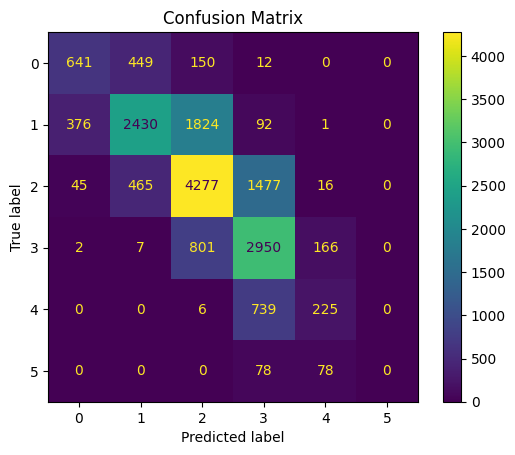

In [7]:
cm = confusion_matrix(df["score"], df["pred_score"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(Config.NUM_CLASSES)))

# Plot the confusion matrix
disp.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Precision, Recall, and F1 Score

In [8]:
precision, recall, f1_score, support = score(df["score"], df["pred_score"])

/media/ishfar/New Volume/Studies/Projects/Kaggle-Automated-Essay-Scoring/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [9]:
score_df = pd.DataFrame.from_dict(
    {
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "support": support,
    }
)
score_df

,precision,recall,f1_score,support
0,0.602444,0.511981,0.553541,1252
1,0.725157,0.514503,0.601932,4723
2,0.605979,0.681051,0.641326,6280
3,0.551608,0.751401,0.636187,3926
4,0.462963,0.231959,0.309066,970
5,0.000000,0.000000,0.000000,156


In [10]:
px.line(score_df, y=["precision", "recall", "f1_score"])